In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib
from sklearn.pipeline import Pipeline


In [2]:
df=pd.read_csv('/content/final_internship_data.csv')
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [3]:
df.tail()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
499995,er7Luy6J,Morgan Smith,Gabriel Coleman,Bad,rainy,Dense Traffic,2015-05-07 18:45:12.0000004,7.0,2015-05-07 18:45:12,-1.291173,...,5,3,2015,42.565403,36.580043,17.157511,20.401068,12.280187,1.404709,-2.275706
499996,FWDZu9NA,Dillon Jackson,Larry Richards,Very Good,rainy,Flow Traffic,2010-09-13 12:11:34.0000004,13.7,2010-09-13 12:11:34,-1.291595,...,9,0,2010,41.814877,27.833416,26.463167,8.596656,0.994796,0.994184,2.556931
499997,QZIMcpLZ,Michael Rodriguez,Lonnie Santana,Bad,rainy,Flow Traffic,2014-08-25 00:22:20.0000001,25.0,2014-08-25 00:22:20,-1.291262,...,8,0,2014,31.780108,38.960930,19.708214,19.066488,11.663395,7.859324,-1.926251
499998,AD72Uwmn,Deborah Soto,Emily Rivera,Good,stormy,Congested Traffic,2015-01-12 12:17:32.0000001,6.5,2015-01-12 12:17:32,-1.291101,...,1,0,2015,42.292914,36.382813,17.227166,20.006433,11.819775,0.994470,-0.384817
499999,qGKn4Um5,Eric Jones,Julie King,Very Good,sunny,Flow Traffic,2010-04-12 23:46:58.0000002,4.9,2010-04-12 23:46:58,-1.291312,...,4,0,2010,38.822968,31.517592,23.087427,11.950577,3.873636,1.040272,-2.813690


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [5]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])


In [6]:
df.isna().sum()

,0
User ID,0
User Name,0
Driver Name,0
Car Condition,0
Weather,0
Traffic Condition,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0


In [7]:
df.dropna(inplace=True)

In [8]:
df.describe()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,499995.000000,499995,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358182,2012-03-20 23:58:38.704932864,-1.265714,0.696742,-1.265755,0.696675,1.683445,13.510843,15.684239,6.268617,3.042020,2011.739129,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
min,-44.900000,2009-01-01 00:31:32,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,2010-08-19 20:57:34.500000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,2012-03-18 19:10:17,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,2013-10-19 06:23:00,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,2015-06-30 23:38:21,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593
std,9.916069,NaN,0.206934,0.140906,0.205903,0.128997,1.307391,6.511596,8.681092,3.437798,1.949243,1.860897,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548


In [9]:
df=df[(df['fare_amount']>=1)]
df=df[(df['distance']!=0)]

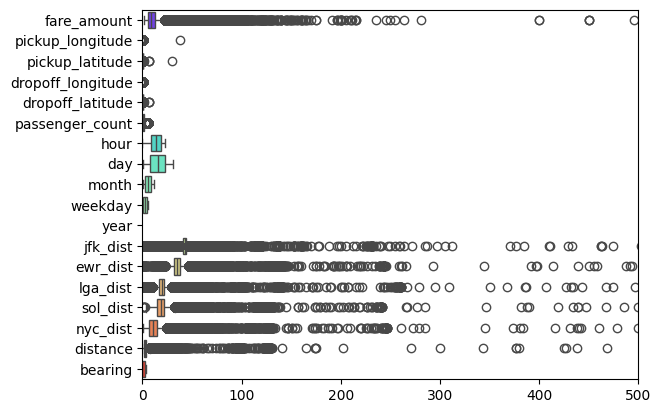

In [10]:
sns.boxplot(data=df, palette='rainbow', orient='h')
plt.xlim(0, 500)
plt.show()

In [11]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)


selectedcols = df.select_dtypes(include=['float64', 'int64']) \
                 .drop(columns=['hour', 'day', 'month', 'year'])

for col in selectedcols.columns:
  cap_outliers(df,col)


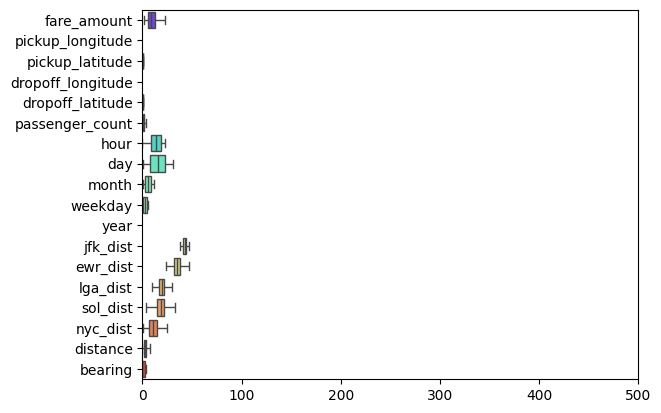

In [12]:
sns.boxplot(data=df, palette='rainbow', orient='h')
plt.xlim(0, 500)
plt.show()

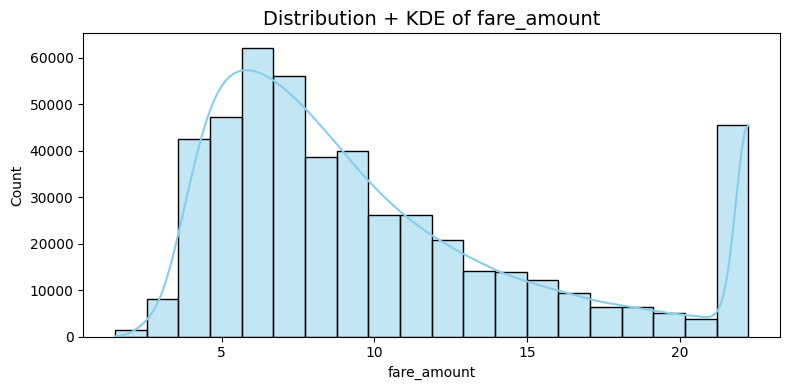

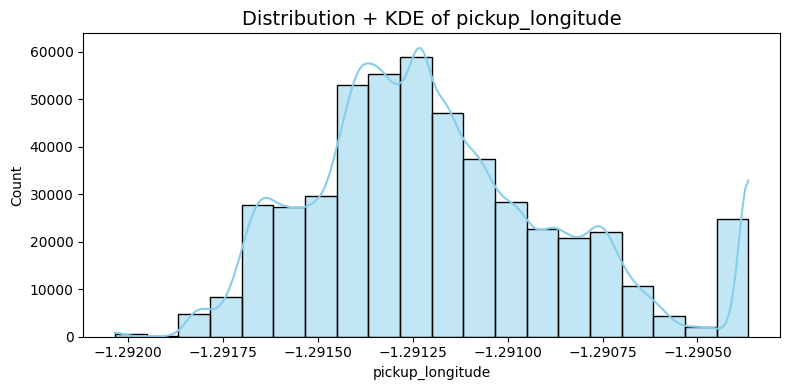

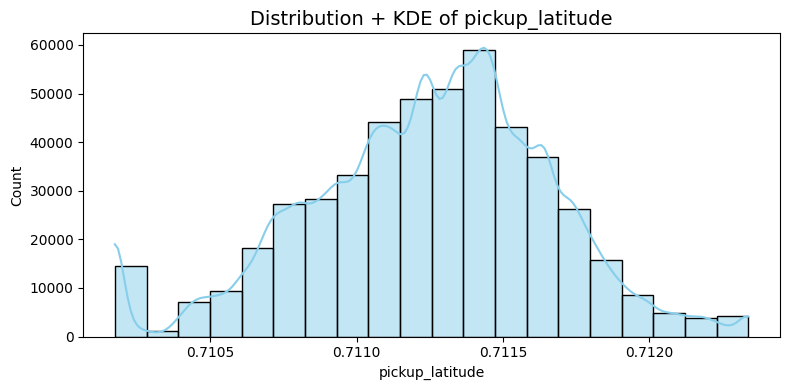

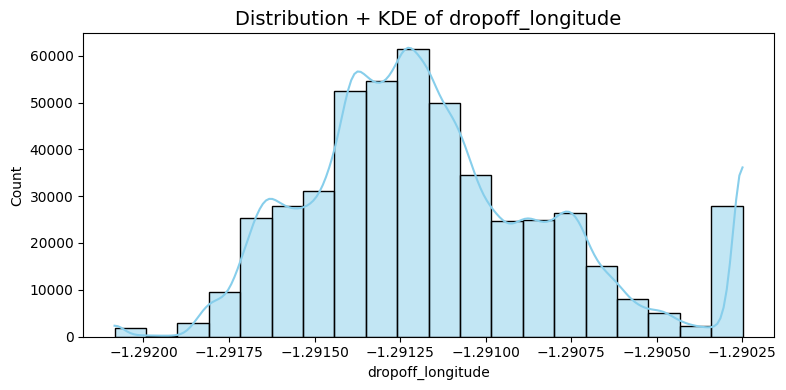

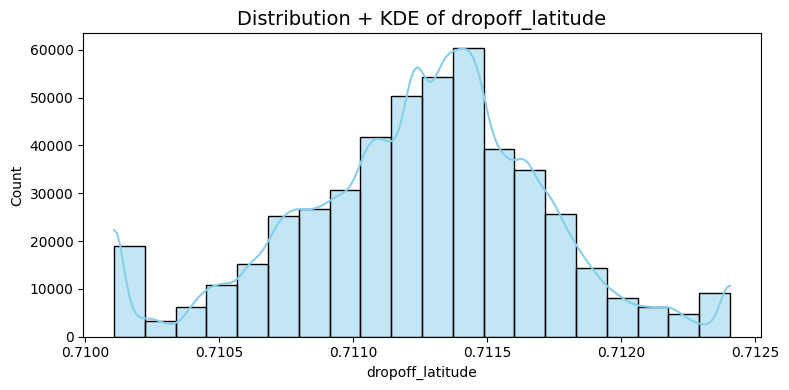

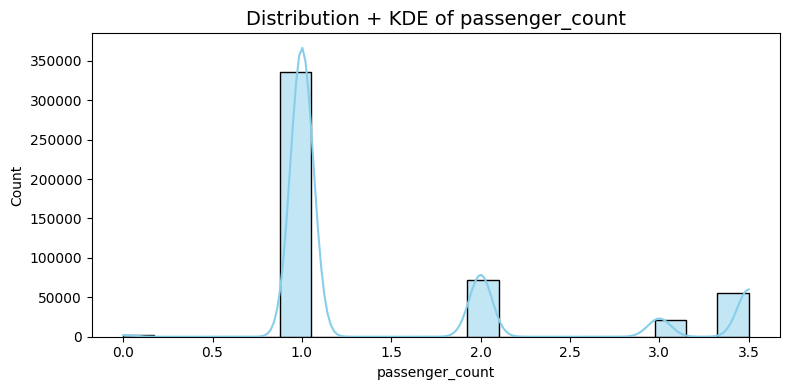

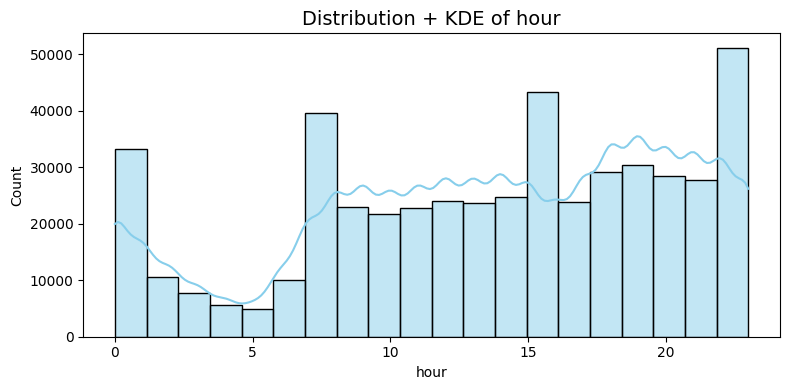

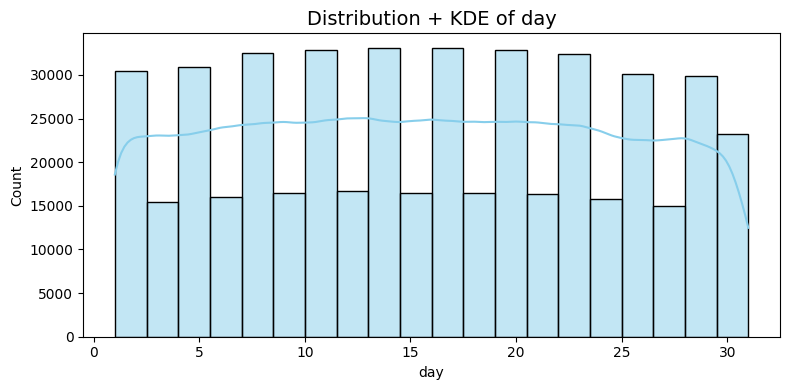

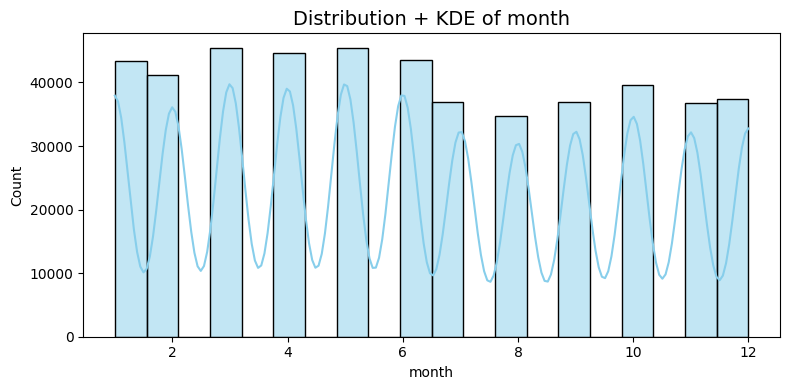

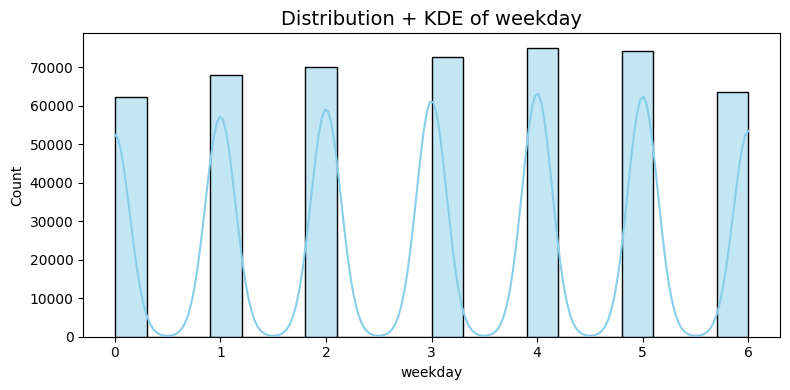

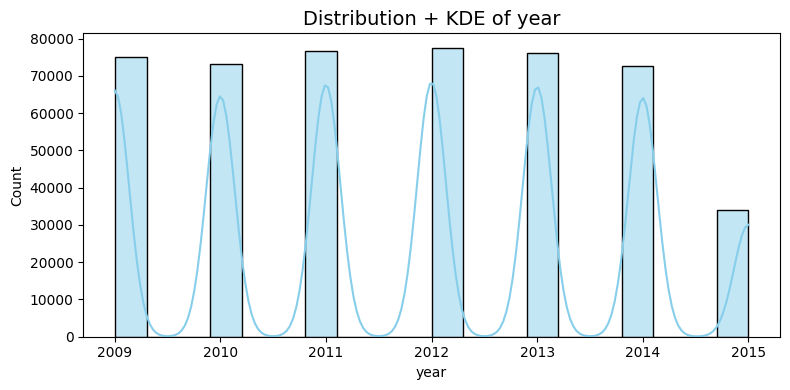

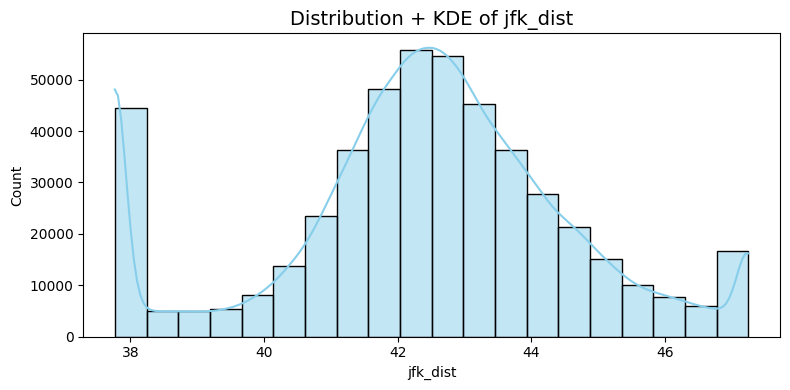

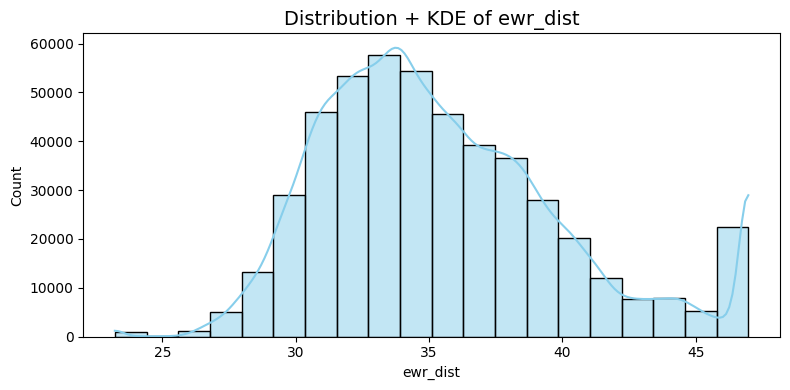

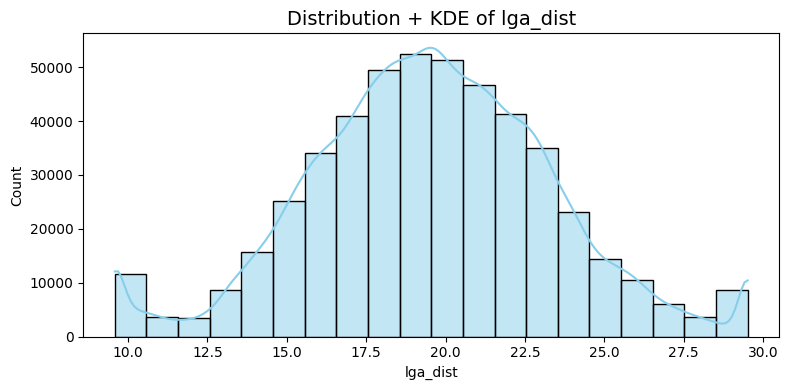

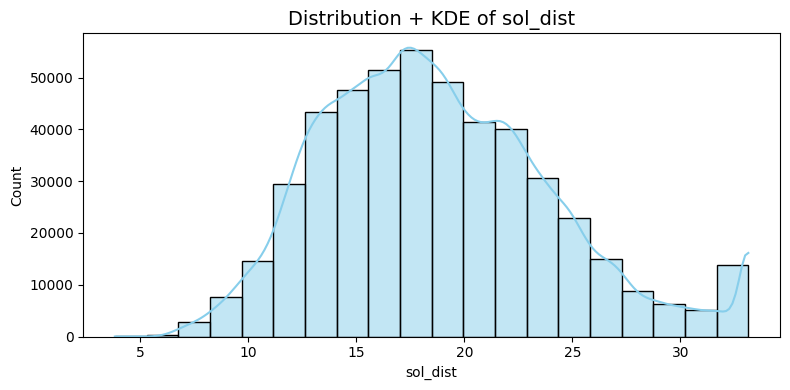

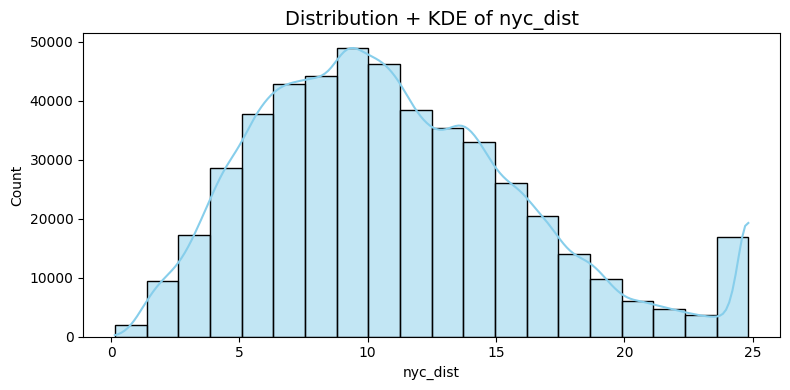

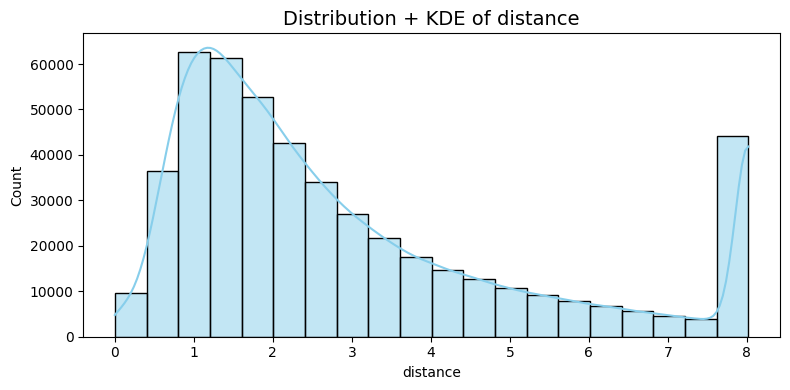

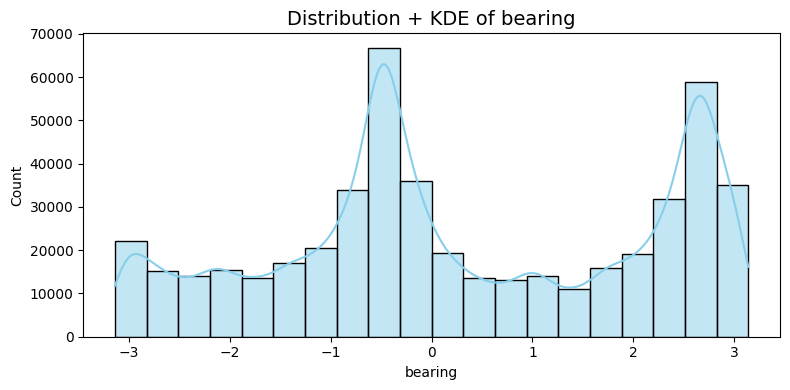

In [13]:
import matplotlib.pyplot as plt

# Select numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, kde=True, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution + KDE of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()



Text(0.5, 1.0, 'Correlation Matrix')

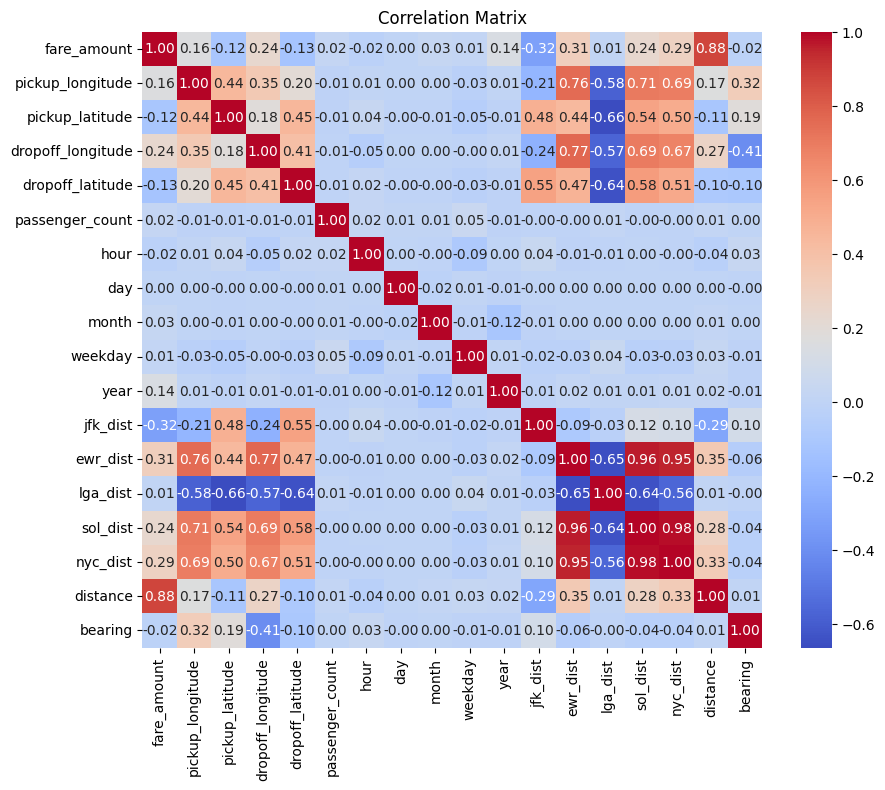

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")



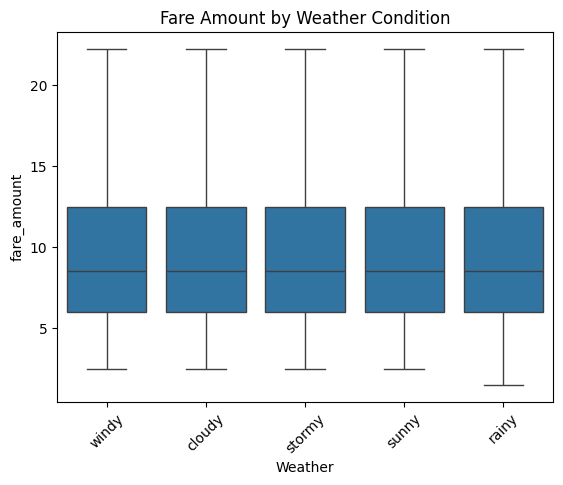

In [15]:
sns.boxplot(x='Weather', y='fare_amount', data=df)
plt.title("Fare Amount by Weather Condition")
plt.xticks(rotation=45)
plt.show()


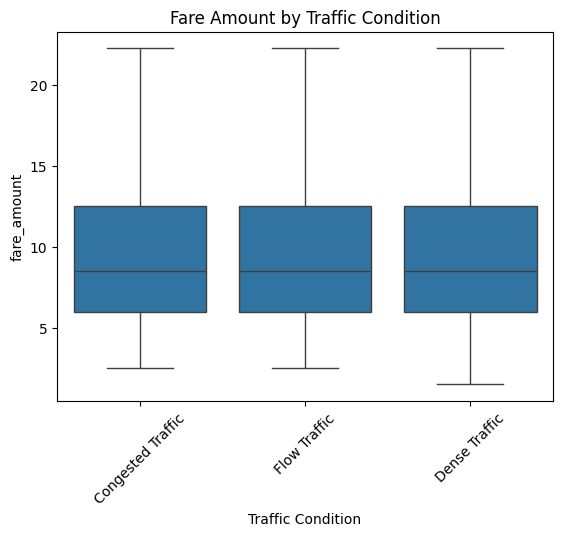

In [16]:
sns.boxplot(x='Traffic Condition', y='fare_amount', data=df)
plt.title("Fare Amount by Traffic Condition")
plt.xticks(rotation=45)
plt.show()


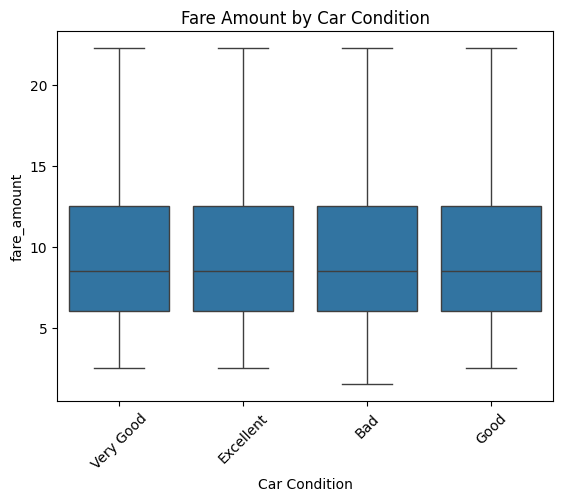

In [17]:
sns.boxplot(x='Car Condition', y='fare_amount', data=df)
plt.title("Fare Amount by Car Condition")
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


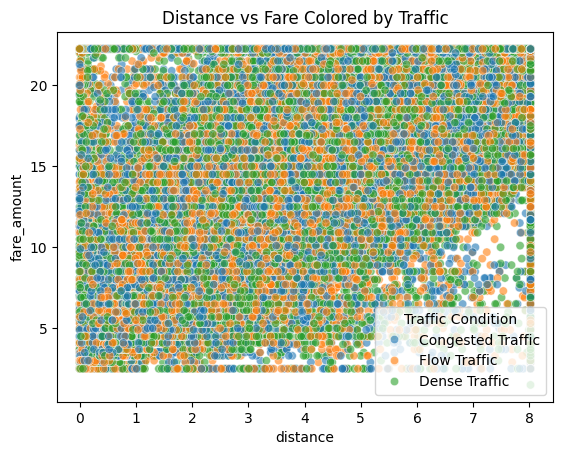

In [18]:
sns.scatterplot(x='distance', y='fare_amount', hue='Traffic Condition', data=df, alpha=0.6)
plt.title("Distance vs Fare Colored by Traffic")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


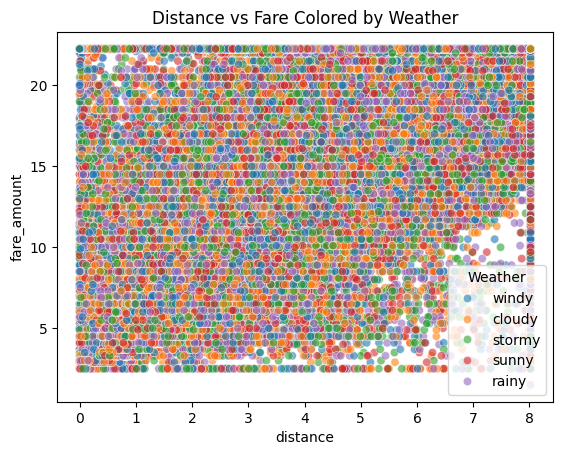

In [19]:
sns.scatterplot(x='distance', y='fare_amount', hue='Weather', data=df, alpha=0.6)
plt.title("Distance vs Fare Colored by Weather")
plt.show()


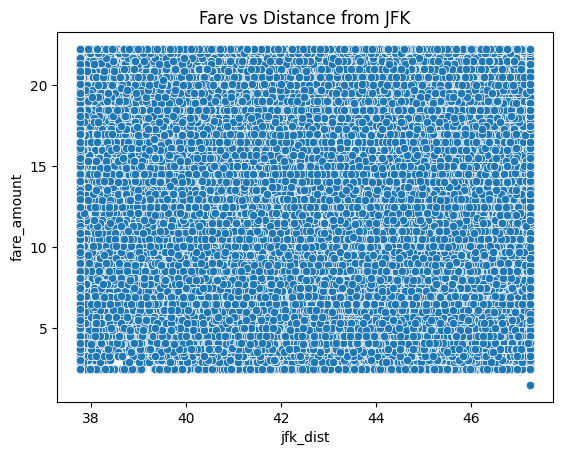

In [20]:
sns.scatterplot(x='jfk_dist', y='fare_amount', data=df)
plt.title("Fare vs Distance from JFK")
plt.show()


/tmp/ipython-input-785826946.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='fare_amount', data=df, estimator='mean', palette='Set3')


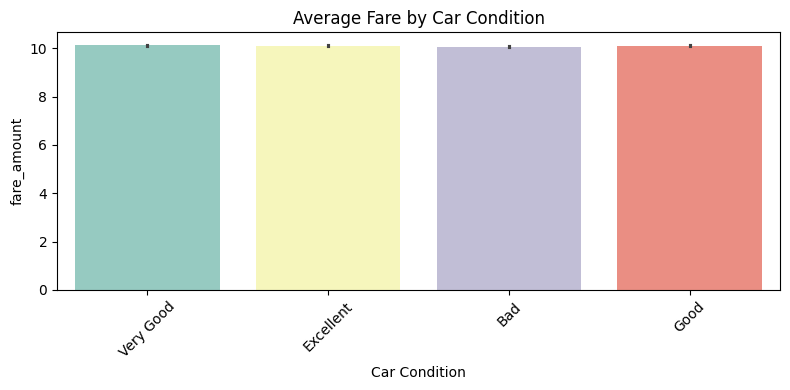

/tmp/ipython-input-785826946.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='fare_amount', data=df, estimator='mean', palette='Set3')


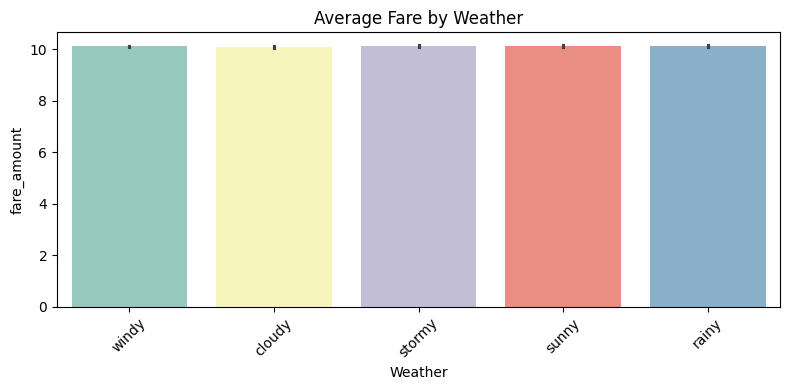

/tmp/ipython-input-785826946.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='fare_amount', data=df, estimator='mean', palette='Set3')


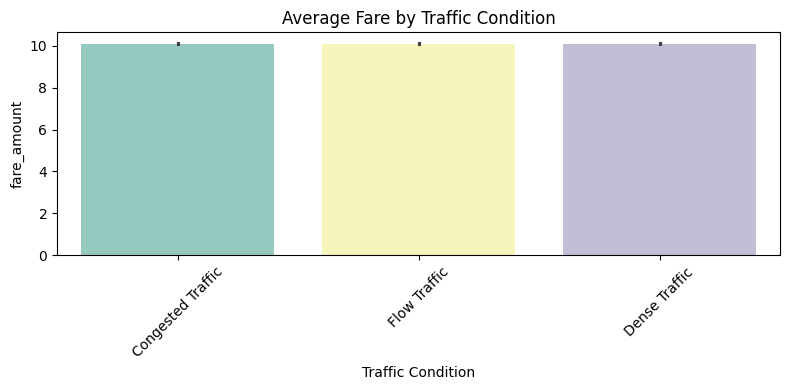

In [21]:
cat_cols=['Car Condition','Weather','Traffic Condition']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=col, y='fare_amount', data=df, estimator='mean', palette='Set3')
    plt.title(f"Average Fare by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Text(0.5, 1.0, 'Trend: Average Fare by Hour')

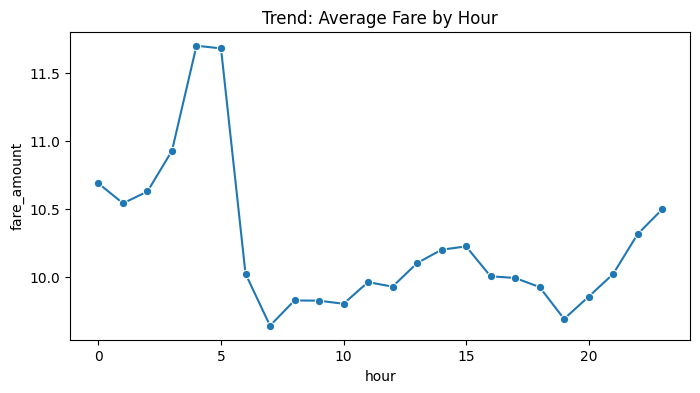

In [22]:
plt.figure(figsize=(8, 4))
hourly = df.groupby('hour')['fare_amount'].mean().reset_index()
sns.lineplot(x='hour', y='fare_amount', data=hourly, marker='o')
plt.title("Trend: Average Fare by Hour")


In [23]:
df['fare_amount_log']=np.log1p(df['fare_amount'])

In [24]:
df['distance_hour'] = df['distance'] * df['hour']
df['distance_weekday'] = df['distance'] * df['weekday']
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)
df['is_peak_hour'] = df['hour'].apply(lambda x: 1 if (7 <= x <= 9 or 16 <= x <= 19) else 0)


In [25]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(get_season)
df = pd.get_dummies(df, columns=['season'], drop_first=True)


In [26]:
df = df.drop(columns=[
    'User ID','User Name','Driver Name',
    'key',
    'pickup_datetime',
    'pickup_latitude', 'pickup_longitude',
    'dropoff_latitude', 'dropoff_longitude',
    'jfk_dist', 'ewr_dist', 'lga_dist','fare_amount'
], errors='ignore')

In [27]:
X = df.drop(columns=['fare_amount_log'])
y = df['fare_amount_log']

cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols)
])

X_processed = preprocessor.fit_transform(X)

cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
all_feature_names = np.concatenate([num_cols, cat_feature_names])

X_df = pd.DataFrame(X_processed, columns=all_feature_names)


In [28]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_df)
print(f"Original shape: {X_df.shape}")
print(f"PCA shape: {X_pca.shape}")

Original shape: (485708, 23)
PCA shape: (485708, 16)


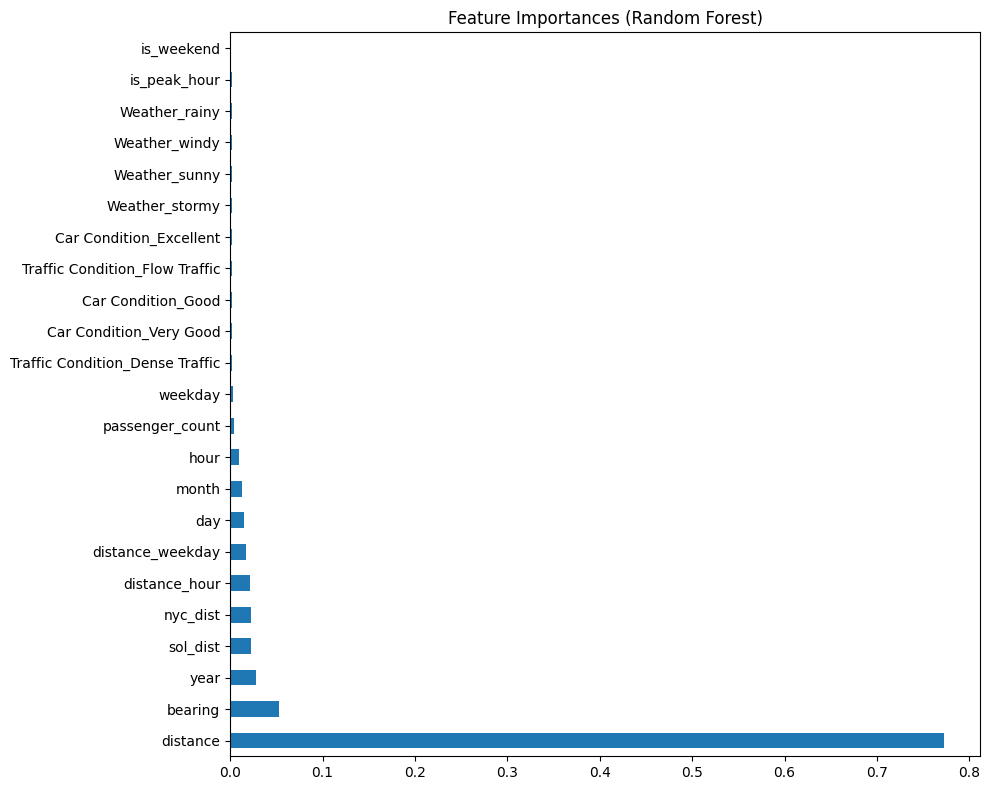

In [29]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_df, y)
importances = pd.Series(rf.feature_importances_, index=X_df.columns)
importances.sort_values(ascending=False).plot(kind='barh', figsize=(10, 8))
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

r2 = r2_score(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)
cv_r2 = cross_val_score(model, X_df, y, cv=5, scoring='r2').mean()

cv_results = []
cv_results.append({"Model": "Linear Regression", "R2": r2, "CV R2": cv_r2, "RMSE": rmse, "MAE": mae})

In [32]:
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
preds = model.predict(X_test)

r2 = r2_score(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)
cv_r2 = cross_val_score(model, X_df, y, cv=5, scoring='r2').mean()

cv_results.append({"Model": "Ridge Regression", "R2": r2, "CV R2": cv_r2, "RMSE": rmse, "MAE": mae})

In [33]:
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)
preds = model.predict(X_test)

r2 = r2_score(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)
cv_r2 = cross_val_score(model, X_df, y, cv=5, scoring='r2').mean()

cv_results.append({"Model": "Lasso Regression", "R2": r2, "CV R2": cv_r2, "RMSE": rmse, "MAE": mae})

In [34]:
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

r2 = r2_score(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)
cv_r2 = cross_val_score(model, X_df, y, cv=5, scoring='r2').mean()

cv_results.append({"Model": "XGBoost", "R2": r2, "CV R2": cv_r2, "RMSE": rmse, "MAE": mae})

In [35]:
cv_results_df = pd.DataFrame(cv_results).sort_values(by="CV R2", ascending=False)
cv_results_df.reset_index(drop=True)

,Model,R2,CV R2,RMSE,MAE
0,XGBoost,0.834337,0.836197,0.187429,0.120811
1,Ridge Regression,0.742183,0.741820,0.233820,0.166922
2,Linear Regression,0.742183,0.741820,0.233820,0.166922
3,Lasso Regression,0.671277,0.671211,0.264022,0.205730


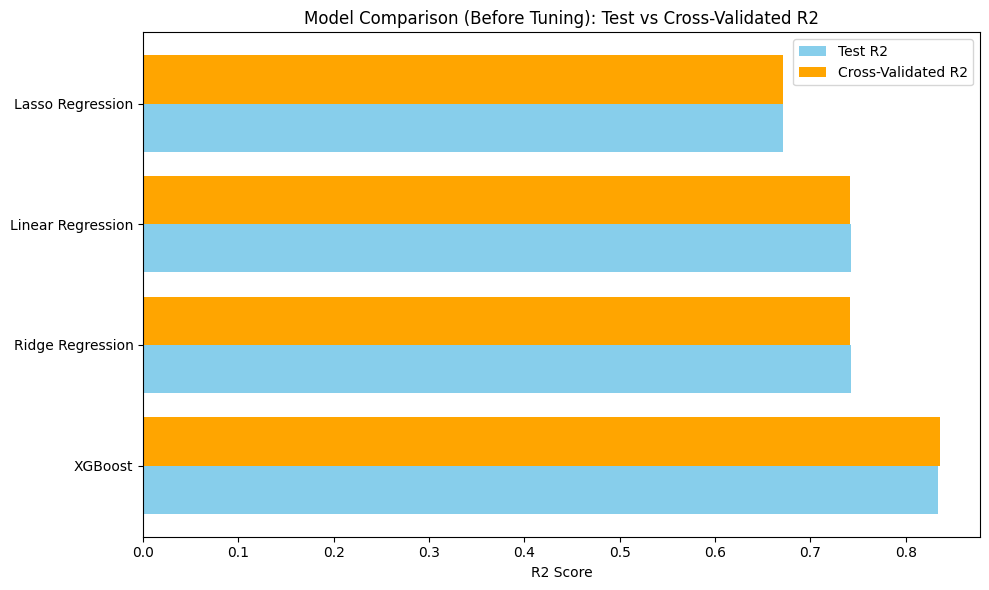

In [36]:
bar_width = 0.4
y_pos = np.arange(len(cv_results_df))

plt.figure(figsize=(10, 6))
plt.barh(y_pos - bar_width/2, cv_results_df['R2'], height=bar_width, color='skyblue', label='Test R2')
plt.barh(y_pos + bar_width/2, cv_results_df['CV R2'], height=bar_width, color='orange', label='Cross-Validated R2')
plt.yticks(y_pos, cv_results_df['Model'])
plt.xlabel("R2 Score")
plt.title("Model Comparison (Before Tuning): Test vs Cross-Validated R2")
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
ridge_grid = GridSearchCV(Ridge(), {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}, cv=3, scoring='r2', n_jobs=-1)
ridge_grid.fit(X_train, y_train)
ridge_best = ridge_grid.best_estimator_
print("Best Ridge Params:", ridge_grid.best_params_)
print("Best CV R2:", ridge_grid.best_score_)

Best Ridge Params: {'alpha': 10.0}
Best CV R2: 0.741704798306407


In [38]:
lasso_grid = GridSearchCV(Lasso(), {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}, cv=3, scoring='r2', n_jobs=-1)
lasso_grid.fit(X_train, y_train)
lasso_best = lasso_grid.best_estimator_
print("Best Lasso Params:", lasso_grid.best_params_)
print("Best CV R2:", lasso_grid.best_score_)

Best Lasso Params: {'alpha': 0.001}
Best CV R2: 0.7416130701329314


In [39]:
xgb_grid = GridSearchCV(XGBRegressor(random_state=42, verbosity=0), {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}, cv=3, scoring='r2', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
xgb_best = xgb_grid.best_estimator_
print("Best XGBoost Params:", xgb_grid.best_params_)
print("Best CV R2:", xgb_grid.best_score_)

Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best CV R2: 0.8381554222532565


In [40]:
tuned_results = []
for name, model in zip(["Ridge Regression (Tuned)", "Lasso Regression (Tuned)", "XGBoost (Tuned)"], [ridge_best, lasso_best, xgb_best]):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    cv_r2 = cross_val_score(model, X_df, y, cv=5, scoring='r2').mean()
    tuned_results.append({
        "Model": name,
        "R2": r2,
        "CV R2": cv_r2,
        "RMSE": rmse,
        "MAE": mae
    })

In [41]:
tuned_results_df = pd.DataFrame(tuned_results).sort_values(by="CV R2", ascending=False)
tuned_results_df.reset_index(drop=True)

,Model,R2,CV R2,RMSE,MAE
0,XGBoost (Tuned),0.837169,0.839236,0.185821,0.119384
1,Ridge Regression (Tuned),0.742183,0.741820,0.233820,0.166923
2,Lasso Regression (Tuned),0.742100,0.741724,0.233857,0.167004


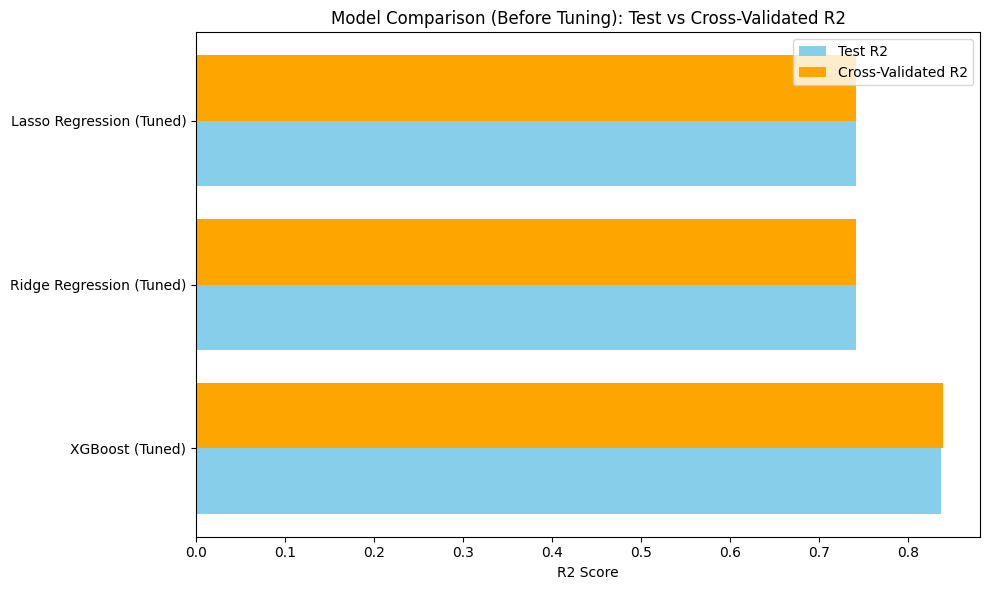

In [42]:
bar_width = 0.4
y_pos = np.arange(len(tuned_results_df))

plt.figure(figsize=(10, 6))
plt.barh(y_pos - bar_width/2, tuned_results_df['R2'], height=bar_width, color='skyblue', label='Test R2')
plt.barh(y_pos + bar_width/2, tuned_results_df['CV R2'], height=bar_width, color='orange', label='Cross-Validated R2')
plt.yticks(y_pos, tuned_results_df['Model'])
plt.xlabel("R2 Score")
plt.title("Model Comparison (Before Tuning): Test vs Cross-Validated R2")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Cell: save_pipeline


# Replace these names with the exact variable names in your notebook if different
# - preprocessor : your ColumnTransformer / preprocessing pipeline
# - xgb_best or best_model : the tuned XGBoost regressor you selected as best

pipeline = Pipeline([
    ('preprocessor', preprocessor),   # your preprocessing transformer (ColumnTransformer)
    ('model', xgb_best)               # your best trained regressor
])

joblib.dump(pipeline, 'pipeline.pkl')
print("Saved pipeline.pkl")
